### Log Transformation

One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.

Let's look at our generated sales data again and compare the original plot with the log transformed plot.



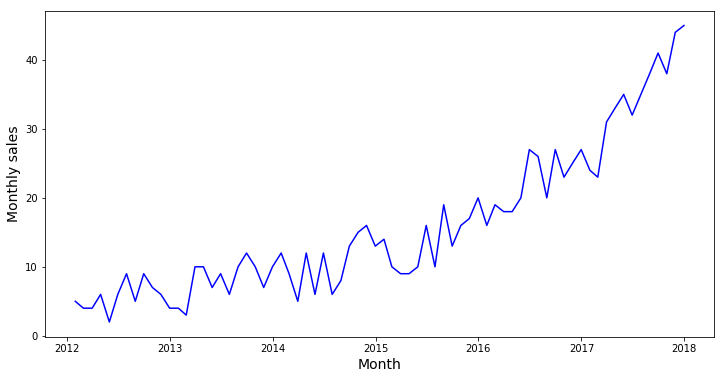

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Generated monthly sales
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+6
data = pd.Series(final_series, index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly sales', fontsize=14)
plt.show()

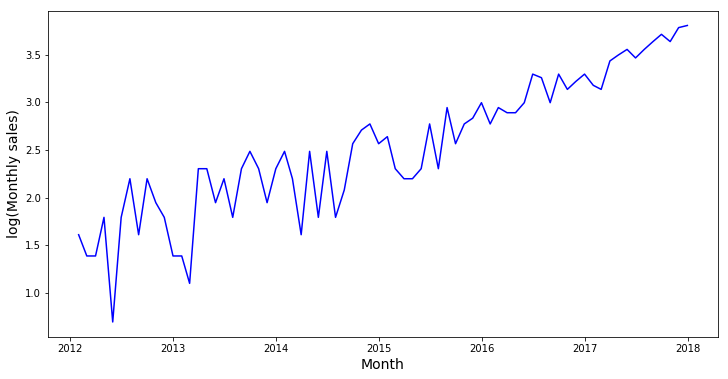

In [2]:
data = pd.Series(np.log(final_series), index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(Monthly sales)', fontsize=14)
plt.show()

You can notice here that this series is not stationary (yet), but taking the log did make the trend more linear, which might be a first step in the right direction. The issue is however that there seems to be more heterosceda

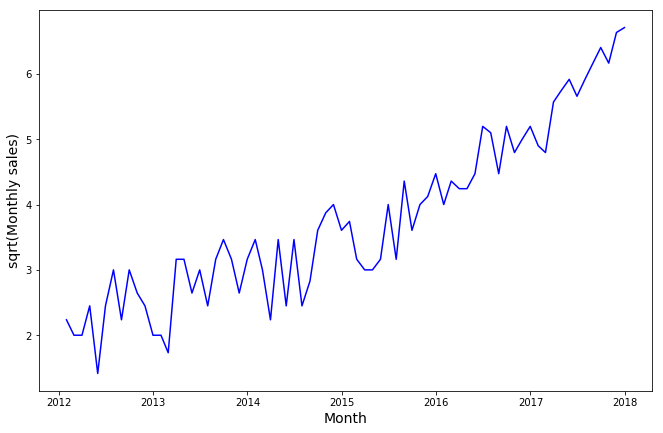

In [3]:
data = pd.Series(np.sqrt(final_series), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('sqrt(Monthly sales)', fontsize=14)
plt.show()

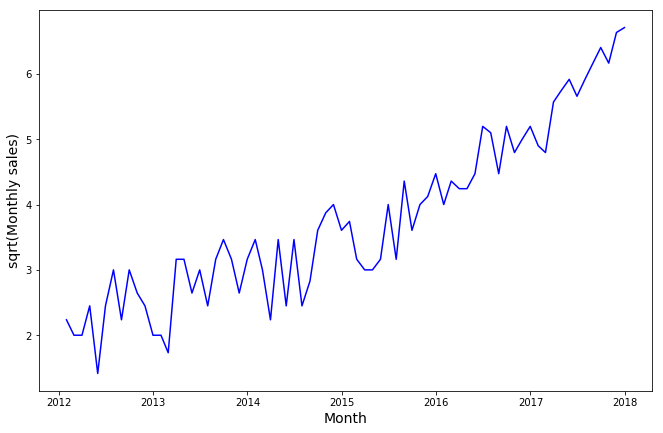

In [4]:
# taking sqrt 
data = pd.Series(np.sqrt(final_series), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('sqrt(Monthly sales)', fontsize=14)
plt.show()

-----------

# Subtracting the rolling mean.

------------

### The rolling mean

From previously, you know that you can look at the rolling mean to visually check if the mean changes over time.

The rolling mean can actually serve another purpose as well. You can calculate the rolling mean and subtract it from the time series to make sure your time series is stationary. The code to do this can be found below:

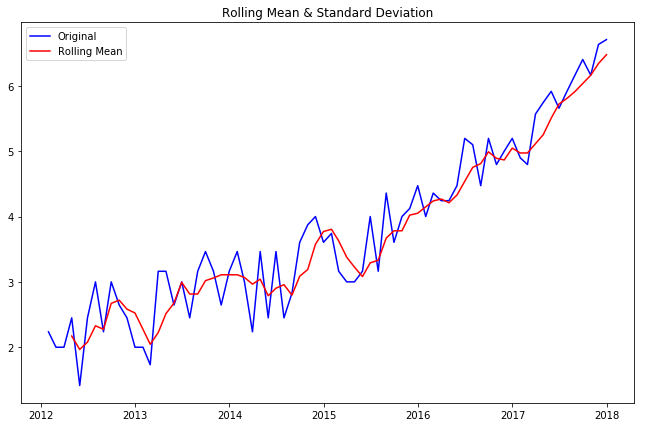

In [6]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The red line shows the rolling mean. Let's subtract this from the original series. Note that since we are taking the average of the last four values, the rolling mean is not defined for the first three values.

In [8]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(10)

2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30    0.278100
2012-05-31   -0.551712
2012-06-30    0.371191
2012-07-31    0.671702
2012-08-31   -0.038875
2012-09-30    0.328611
2012-10-31   -0.074704
Freq: M, dtype: float64

In [9]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

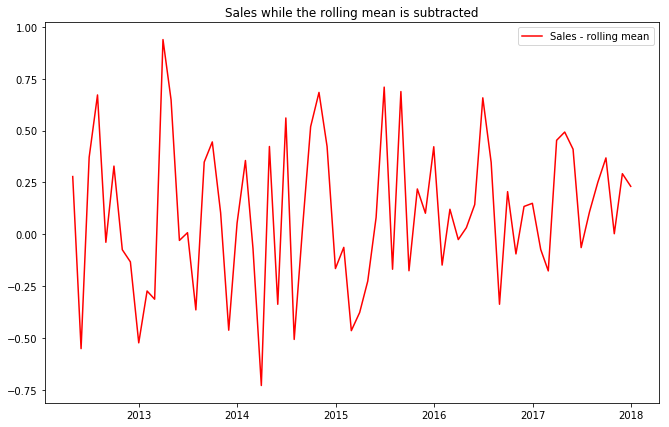

In [10]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='red',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

This seems to be more or less stationary! Note that you can change the window length, which will affect what your eventual time series will look like. You'll experiment with this in the lab!



### The weighted rolling mean

A drawback of the rolling mean approach is that the window has to be strictly defined. In this case, we can take yearly averages but in complex situations like forecasting a stock price, it may be difficult to come up with an exact number. So we take a "weighted rolling mean" (or weighted moving average, WMA for short) where more recent values are given a higher weight. There are several techniques for assigning weights. A popular one is Exponentially Weighted Moving Average where weights are assigned to all the previous values with an exponential decay factor. This can be implemented in Pandas with .ewm() method. Details can be found here.

Note that here the parameter halflife is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay. These definitions are discussed in the link shared above.



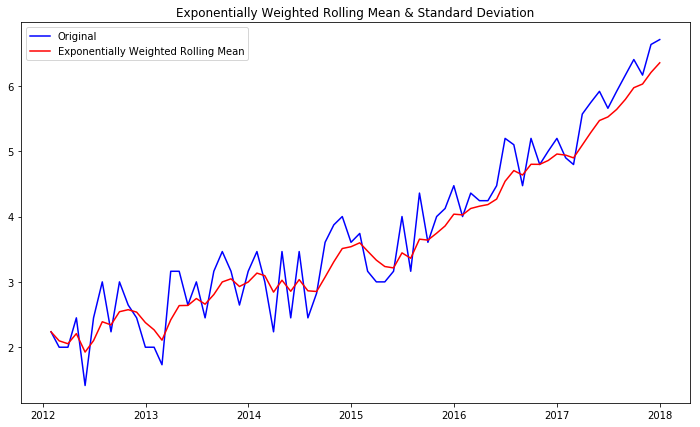

In [12]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = data.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [14]:
# Subtract the moving average from the original data
data_minus_exp_roll_mean = data - exp_roll_mean
data_minus_exp_roll_mean.head(5)

2012-01-31    0.000000
2012-02-29   -0.097783
2012-03-31   -0.053479
2012-04-30    0.241359
2012-05-31   -0.511451
Freq: M, dtype: float64

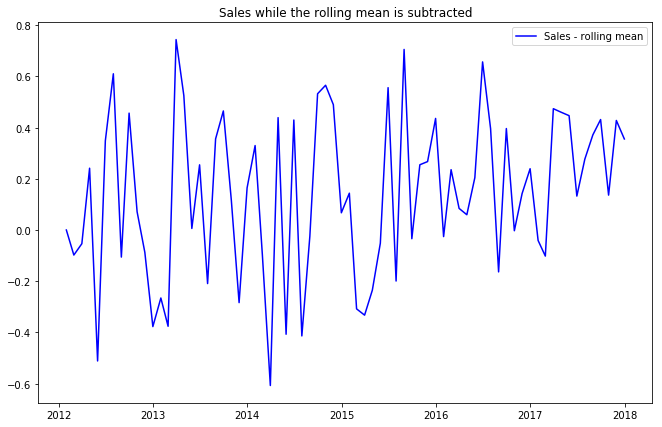

In [15]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

For our sales data, subtracting the weighted mean does not seem to have a better effect than simply subtracting the rolling mean. Still, this might be better in some cases.

## Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). Details on .diff() can be found here.

In [16]:
data_diff = data.diff(periods=1)
data_diff.head(10)

2012-01-31         NaN
2012-02-29   -0.236068
2012-03-31    0.000000
2012-04-30    0.449490
2012-05-31   -1.035276
2012-06-30    1.035276
2012-07-31    0.550510
2012-08-31   -0.763932
2012-09-30    0.763932
2012-10-31   -0.354249
Freq: M, dtype: float64

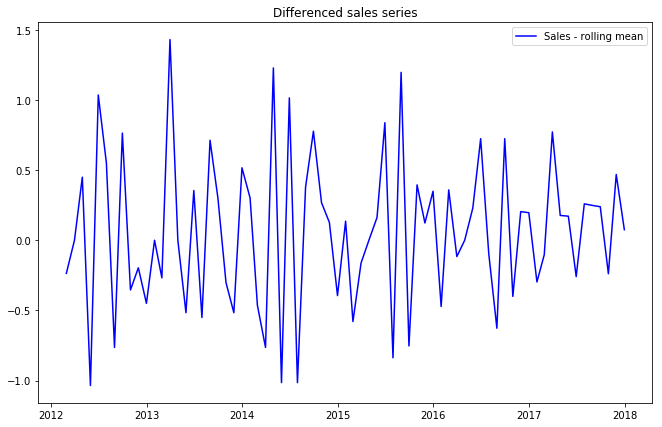

In [17]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

This seems to work pretty well if you want to make the series stationary!

Differencing is a very popular tool to remove seasonal trends from time series. Let's circle back to the temperatures time series we have been working with in this section.

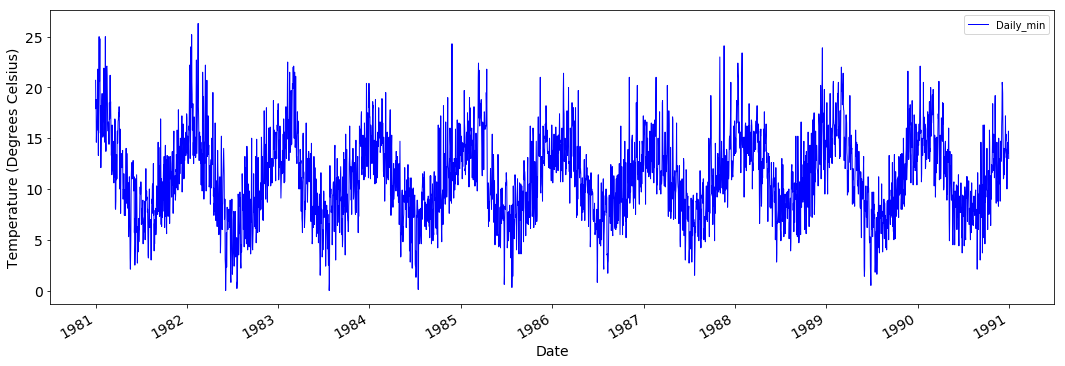

In [18]:
data = pd.read_csv('min_temp.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

data.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=14);

Here, we differenced our temperature data by taking differences of exactly one year, which removes the cyclical seasonality from the time series data! Pretty magical!

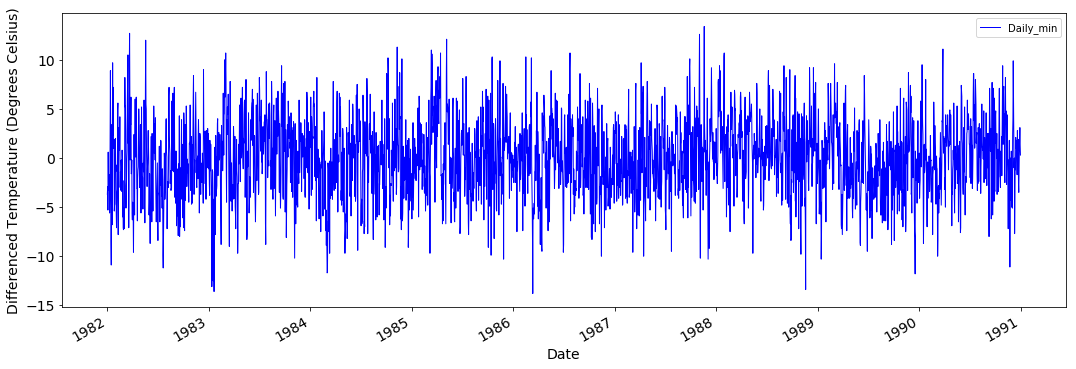

In [19]:
data_diff = data.diff(periods=365)
data_diff.dropna(inplace=True)
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Temperature (Degrees Celsius)', fontsize=14);

# Removing Trends - Lab

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [23]:
# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data.Month)

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Print the first five rows
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


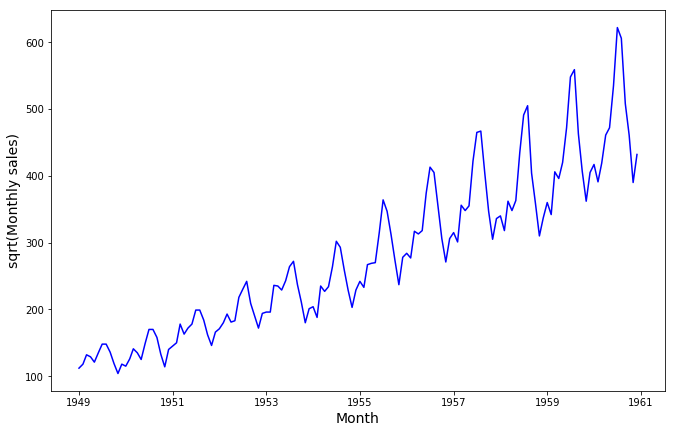

In [24]:
# Plot the time series
# taking sqrt 
fig = plt.figure(figsize=(11,7))
plt.plot(ts, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('sqrt(Monthly sales)', fontsize=14)
plt.show()

## Create a stationarity check

Your next task is to use the code from previous labs to create a function stationarity_check() that takes in a time series and performs stationarity checks including rolling statistics and the Dickey-Fuller test.

We want the output of the function to:

Plot the original time series along with the rolling mean and rolling standard deviation (use a window of 8) in one plot
Output the results of the Dickey-Fuller test

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
def stationarity_check(df):
    
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    fig = plt.figure(figsize=(12,7))
    plt.plot(df, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    dftest = adfuller(df)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '# of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print ('Results of Dickey-Fuller test: \n')

    print(dfoutput)

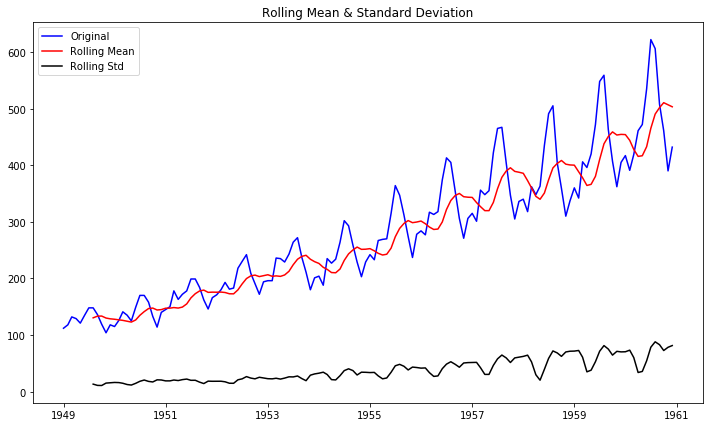

Results of Dickey-Fuller test: 

Test Statistic              0.815369
p-value                     0.991880
#Lags Used                 13.000000
# of Observations Used    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [27]:
stationarity_check(ts)

# Perform a log and square root transform
Plot a log transform of the original time series (ts).

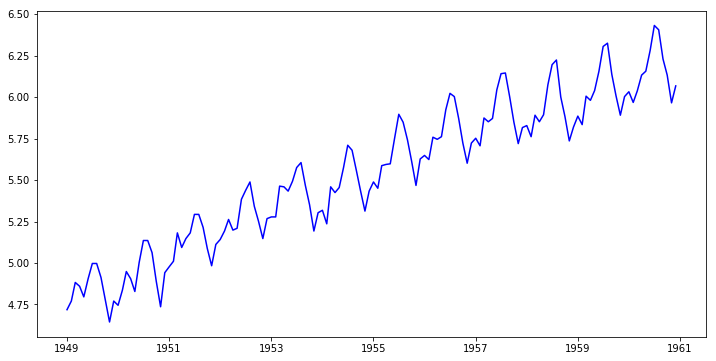

In [28]:
# Plot a log transform
ts_log = np.log(ts)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

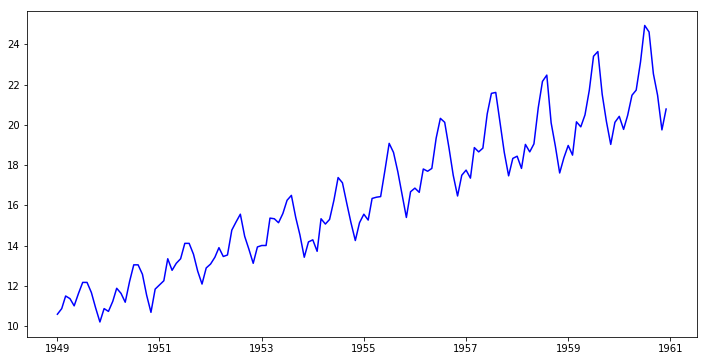

In [29]:
# Plot a square root transform
ts_sqrt = np.sqrt(ts)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

# Subtracting the rolling mean

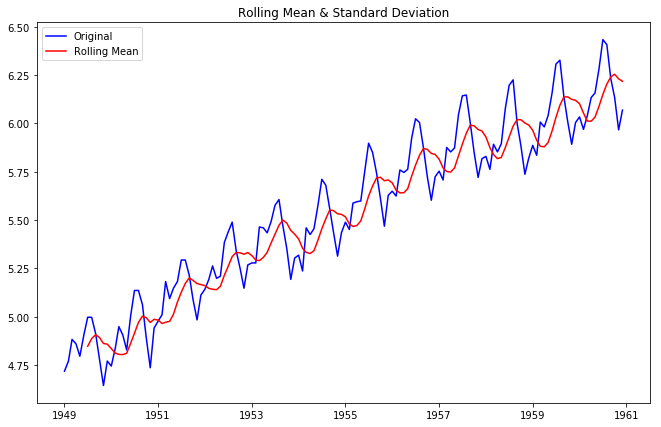

In [30]:
# your code here
roll_mean = np.log(ts).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7)) 
plt.plot(np.log(ts), color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [31]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(ts) - roll_mean
data_minus_roll_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [32]:
# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

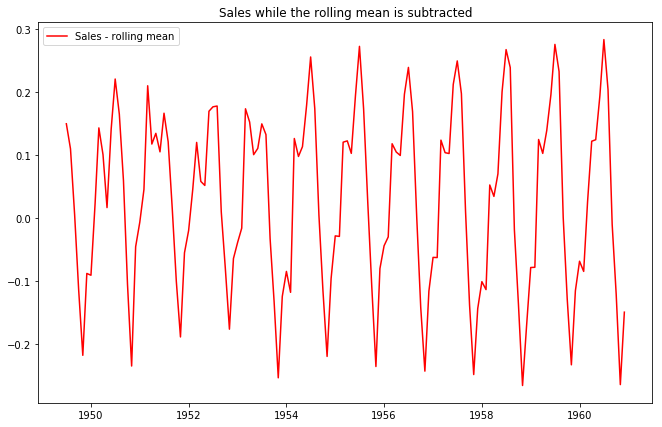

In [33]:
# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='red',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

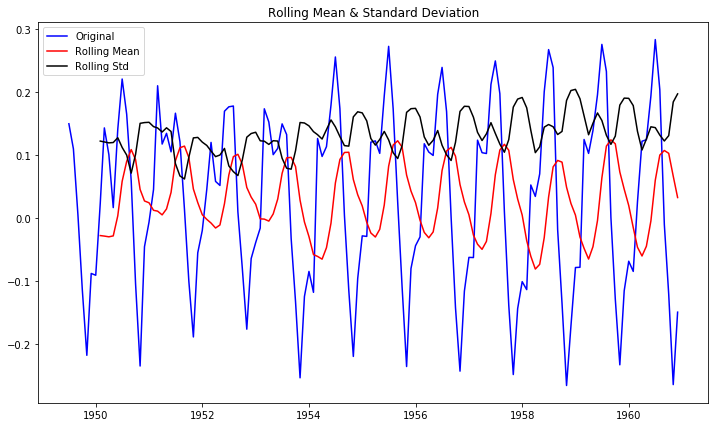

Results of Dickey-Fuller test: 

Test Statistic             -2.348027
p-value                     0.156946
#Lags Used                 14.000000
# of Observations Used    123.000000
Critical Value (1%)        -3.484667
Critical Value (5%)        -2.885340
Critical Value (10%)       -2.579463
dtype: float64


In [34]:
stationarity_check(data_minus_roll_mean)

In [35]:
"""
The time series are not stationary, as the p-value is still substantial 
(0.15 instead of smaller than the typical threshold value 0.05).
"""

'\nThe time series are not stationary, as the p-value is still substantial \n(0.15 instead of smaller than the typical threshold value 0.05).\n'

# Subtracting the weighted rolling mean

Repeat all the above steps to calculate the exponential weighted rolling mean with a halflife of 4. Start from the log-transformed data again. Compare the Dickey-Fuller test results. What do you conclude?


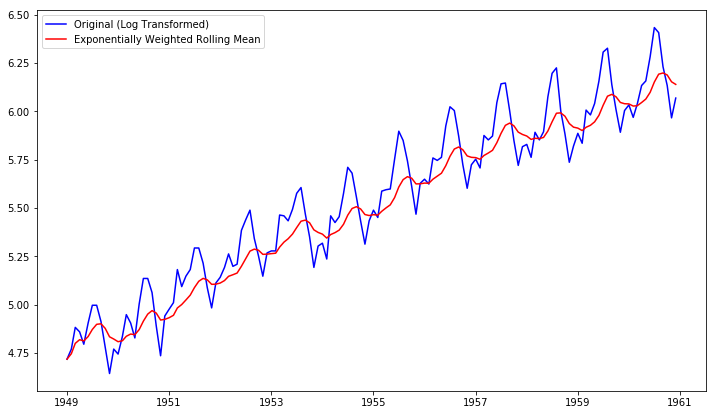

In [36]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = np.log(ts).ewm(halflife=4).mean()


# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
plt.plot(np.log(ts), color='blue',label='Original (Log Transformed)')
plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.show(block=False)

In [38]:
# Subtract this exponential weighted rolling mean from the log transformed data
# Print the resulting time series

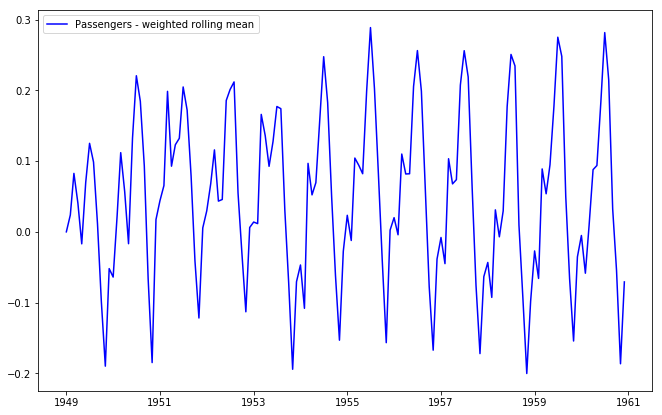

In [37]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_roll_mean = np.log(ts) - exp_roll_mean

# Plot the time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Passengers - weighted rolling mean')
plt.legend(loc='best')
plt.show(block=False)

In [39]:
# Check for stationarity of data_minus_exp_roll_mean using your function.

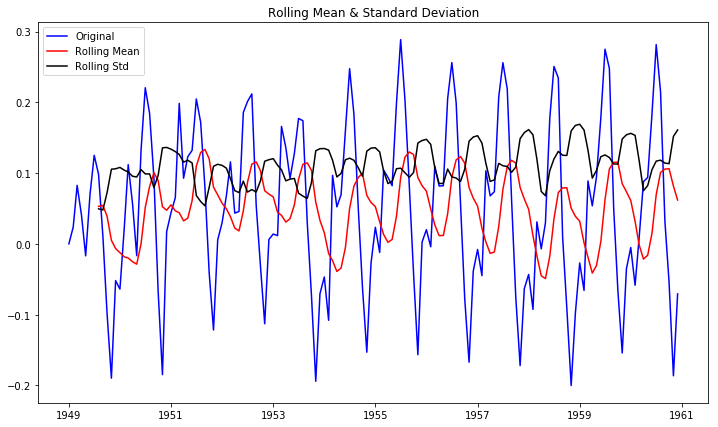

Results of Dickey-Fuller test: 

Test Statistic             -3.297250
p-value                     0.015002
#Lags Used                 13.000000
# of Observations Used    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [40]:
# Do a stationarity check
stationarity_check(data_minus_exp_roll_mean)

In [41]:
"""
The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! 
Do note that there is still strong seasonality.
"""

'\nThe p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! \nDo note that there is still strong seasonality.\n'

# Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of periods. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, drop the missing values, plot the resulting time series, and then run the stationarity check() again.

In [43]:
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff.head(5)

,#Passengers
Month,
1950-01-01,-0.063907
1950-02-01,-0.001185
1950-03-01,0.029307
1950-04-01,0.016168
1950-05-01,0.000194


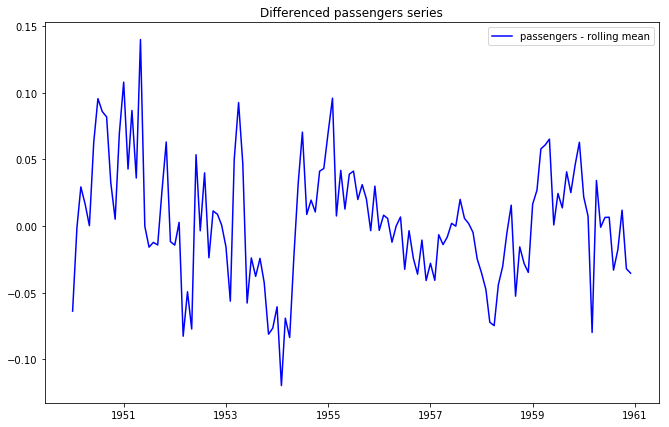

In [44]:
# Plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='passengers - rolling mean')
plt.legend(loc='best')
plt.title('Differenced passengers series')
plt.show(block=False)

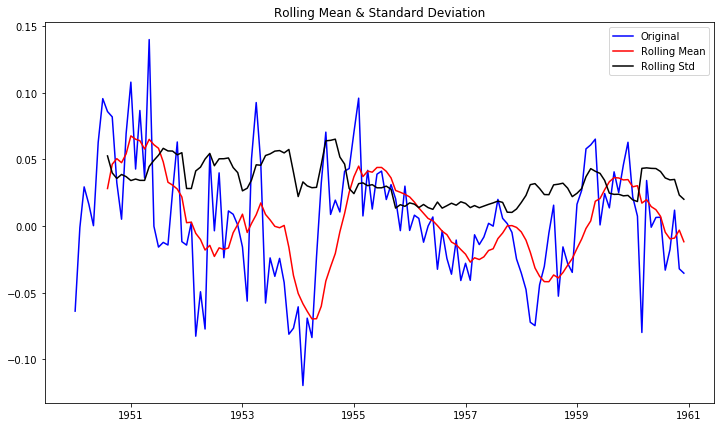

Results of Dickey-Fuller test: 

Test Statistic             -3.601666
p-value                     0.005729
#Lags Used                 12.000000
# of Observations Used    119.000000
Critical Value (1%)        -3.486535
Critical Value (5%)        -2.886151
Critical Value (10%)       -2.579896
dtype: float64


In [45]:
# Perform the stationarity check
stationarity_check(data_diff)

In [46]:
"""
Even though the rolling mean and rolling average lines do seem to be fluctuating, the movements seem to be completely random, 
and the same conclusion holds for the original time series. Your time series is now ready for modeling!
"""

'\nEven though the rolling mean and rolling average lines do seem to be fluctuating, the movements seem to be completely random, \nand the same conclusion holds for the original time series. Your time series is now ready for modeling!\n'